In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
pd.set_option('display.max_colwidth', -1)

Completing the missing data.

First try getting the scraped url: 

In [5]:
url = 'https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download'

r = requests.get(url,allow_redirects=True)

open('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)

8862

We get one file (zip) but it doesn't work.

We analize the redirect:

In [6]:
response = requests.get('https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download')
if response.history:
    print("Request was redirected")
    for resp in response.history:
        print(resp.status_code, resp.url)
    print("Final destination:")
    print(response.status_code, response.url)
else:
    print("Request was not redirected")

Request was redirected
302 https://www.kaggle.com/soubenz/forbes-top-billionaires-list-2018/download
Final destination:
200 https://www.kaggle.com/account/login?returnUrl=%2Fsoubenz%2Fforbes-top-billionaires-list-2018%2Fdata


We see that we do not arrive to the final url (to the zip file) because of the logging, but we can get the final url analizing with Google inspector:

In [7]:
url = 'https://storage.googleapis.com/kaggle-data-sets/33081/43334/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1577444456&Signature=s1ps2cSD66ljVlrSc7GxNSd36grxjA6Ih1PUrWntmvYrjqKRs4PnNkwSvdZrhx5pLm944%2FTNadtVV%2Fwm712VJJ%2Bhwq13IvDKGl4uv9ZxXSa7rNmZj5Mcqx6j2TYCUiIACGbmgQJQHt8BOOa6KYz7EaJR128%2Bn9E8WF0tZGa0oaLnMgZZk3i2IamdOkL9BnSr1EuzL9pvIL3uP1l7lhuIEXCdFRe79cr8AbNTAB269FE6%2BRNPS%2Bmx55wnp9MWbcCAgNZyEzxLPNcM0liI9w5pQY6OQIGfruWLUgX0ObS53SQmXCRMeUTm3o%2BlBuq1qFCbVxDsdfgcufX3ydCigZ0GvQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dforbes-top-billionaires-list-2018.zip'

r = requests.get(url)

open('../data/raw/forbes-top-billionaires-list-2018.zip','wb').write(r.content)

115140

In [8]:
url = 'https://www.kaggle.com/fernandol/countries-of-the-world/download'

r = requests.get(url,allow_redirects=True)

open('../data/raw/world-countries.zip','wb').write(r.content)

8862

In [9]:
response = requests.get('https://www.kaggle.com/fernandol/countries-of-the-world/download')
if response.history:
    print("Request was redirected")
    for resp in response.history:
        print(resp.status_code, resp.url)
    print("Final destination:")
    print(response.status_code, response.url)
else:
    print("Request was not redirected")

Request was redirected
302 https://www.kaggle.com/fernandol/countries-of-the-world/download
Final destination:
200 https://www.kaggle.com/account/login?returnUrl=%2Ffernandol%2Fcountries-of-the-world%2Fdata


In [10]:
url = 'https://storage.googleapis.com/kaggle-data-sets/23752/30346/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1577448698&Signature=Bn2qMZEnH4OGTT9Z4OilcruHfey5fE6kdmjPNh9Uw%2FXEnc%2FhHShAlXL72jlUQq4wXHQhbQYva%2FS1YkwnZI0xLFdlbToJNENPRyev%2Btfq9vr129kVxPtBio7m3ivB3wdbysUdN2exAmaZ0Phi%2B7%2BzE5CXnDQiJqBkjt1QmM4M8o0CYvyXIJM4zQIIUyqP9d5O4%2Ba44oZQjkfNZN2lLqmossiq0ZI5%2FeR1HwUuHf7OYUrc3nQi9%2BC5BX%2FHf30MZBLPDpWfvBll4Cir9D6QmgYEOO9pURmt8r9%2BLrJmFGAv4AnXdKxXHaXEHxjvNP7Ew67OTLCCec%2BxHLKtn9zuFoYNZA%3D%3D&response-content-disposition=attachment%3B+filename%3Dcountries-of-the-world.zip'

r = requests.get(url,allow_redirects=True)

open('../data/raw/world-countries.zip','wb').write(r.content)

13735

In [11]:
df_forbes = pd.read_csv('../data/raw/forbes-top-billionaires-list-2018.zip')
df_forbes.head(5)

,position,name,lastName,age,country,gender,wealthSource,industry,worth,worthChange,realTimeWorth,realTimePosition,image
0,NaN,Anant Asavabhokhin & family,Asavabhokhin,67.0,Thailand,M,real estate,Real Estate,NaN,-0.001,NaN,1613,https://specials-images.forbesimg.com/imageserve/5ae0e71ca7ea43127982a6f6/416x416.jpg?background=000000&cropX1=909&cropX2=1588&cropY1=17&cropY2=696
1,NaN,Arash Ferdowsi,Ferdowsi,32.0,United States,M,online file storage,Technology,NaN,0.000,NaN,1734,https://specials-images.forbesimg.com/imageserve/5ae0e71ca7ea43127982a6f6/416x416.jpg?background=000000&cropX1=909&cropX2=1588&cropY1=17&cropY2=696
2,NaN,Banthoon Lamsam & family,Lamsam,65.0,Thailand,M,banking,Finance and Investments,NaN,0.001,NaN,1952,https://specials-images.forbesimg.com/imageserve/5ad8e8bea7ea432fbc1f6f2f/416x416.jpg?background=000000&cropX1=1091&cropX2=2771&cropY1=434&cropY2=2113
3,NaN,Bill Adderley & family,Adderley,70.0,United Kingdom,M,home furnishings,Fashion & Retail,NaN,0.000,NaN,1956,https://specials-images.forbesimg.com/imageserve/5ad8e8bea7ea432fbc1f6f2f/416x416.jpg?background=000000&cropX1=1091&cropX2=2771&cropY1=434&cropY2=2113
4,NaN,Boris Zingarevich,Zingarevich,58.0,Russia,M,"pulp and paper, diversified",Diversified,NaN,0.000,NaN,2103,https://specials-images.forbesimg.com/imageserve/5ad8b4844bbe6f2310f30482/416x416.jpg?background=000000&cropX1=1177&cropX2=4510&cropY1=247&cropY2=3577


Identify one space after some strings in 'Country' column of df_countries

In [12]:
df_countries = pd.read_csv('../data/raw/world-countries.zip')
df_countries['Country'].iloc[190]

'Spain '

...but not in df_forbes

In [13]:
df_forbes.rename(columns={'country':'Country'}, inplace=True)
df_forbes['Country'].iloc[57]

'Spain'

In [14]:
cols_forbes = df_forbes.columns.tolist()
cols_forbes

['position',
 'name',
 'lastName',
 'age',
 'Country',
 'gender',
 'wealthSource',
 'industry',
 'worth',
 'worthChange',
 'realTimeWorth',
 'realTimePosition',
 'image']

In [15]:
cols = ['position', 'name', 'lastName', 'age', 'gender', 'wealthSource', 'industry', 'worth', 'worthChange','realTimeWorth','realTimePosition','image','Country']

df_forbes = df_forbes[cols]
df_forbes[52:58]

,position,name,lastName,age,gender,wealthSource,industry,worth,worthChange,realTimeWorth,realTimePosition,image,Country
52,1.0,Jeff Bezos,Bezos,54.0,M,Amazon,Technology,112000.0,0.000,NaN,1,https://specials-images.forbesimg.com/imageserve/5a8d920d31358e4955adf197/416x416.jpg?background=000000&cropX1=755&cropX2=2357&cropY1=494&cropY2=2097,United States
53,2.0,Bill Gates,Gates,62.0,M,Microsoft,Technology,90000.0,-0.001,NaN,2,https://specials-images.forbesimg.com/imageserve/5a942b7b31358e79a28a452b/416x416.jpg?background=000000&cropX1=285&cropX2=3498&cropY1=146&cropY2=3360,United States
54,3.0,Warren Buffett,Buffett,87.0,M,Berkshire Hathaway,Finance and Investments,84000.0,-0.002,NaN,3,https://specials-images.forbesimg.com/imageserve/5a8d9b3a31358e4955adf300/416x416.jpg?background=000000&cropX1=378&cropX2=2650&cropY1=52&cropY2=2322,United States
55,4.0,Bernard Arnault,Arnault,69.0,M,LVMH,Fashion & Retail,72000.0,0.000,NaN,4,https://specials-images.forbesimg.com/imageserve/5a7de808a7ea431690131adf/416x416.jpg?background=000000&cropX1=125&cropX2=2852&cropY1=11&cropY2=2736,France
56,5.0,Mark Zuckerberg,Zuckerberg,34.0,M,Facebook,Technology,71000.0,0.000,NaN,5,https://specials-images.forbesimg.com/imageserve/59d5062131358e542c034eb7/416x416.jpg?background=000000&cropX1=419&cropX2=1409&cropY1=53&cropY2=1044,United States
57,6.0,Amancio Ortega,Ortega,82.0,M,Zara,Fashion & Retail,70000.0,0.000,NaN,6,https://specials-images.forbesimg.com/imageserve/5a810ce6a7ea431690133fe6/416x416.jpg?background=000000&cropX1=250&cropX2=2266&cropY1=4&cropY2=2019,Spain


In [16]:
df_countries['Country'] = df_countries['Country'].map(lambda x: x.strip())

In [17]:
df_countries['Country'].iloc[190]

'Spain'

In [18]:
df_forbes['Country'] = df_forbes['Country'].map(lambda x: x.strip())

In [19]:
df_forbes['Country'].iloc[57]

'Spain'

In [20]:
df_forbes_merge = pd.merge(df_forbes,df_countries, on='Country',sort=True)

In [21]:
df_forbes_merge.sort_values(['position'], axis=0, ascending=True, inplace=True) 
df_forbes_merge[:10]

,position,name,lastName,age,gender,wealthSource,industry,worth,worthChange,realTimeWorth,realTimePosition,image,Country,Region,Population,...,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1620,1.0,Jeff Bezos,Bezos,54.0,M,Amazon,Technology,112000.0,0.000,NaN,1,https://specials-images.forbesimg.com/imageserve/5a8d920d31358e4955adf197/416x416.jpg?background=000000&cropX1=755&cropX2=2357&cropY1=494&cropY2=2097,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
1621,2.0,Bill Gates,Gates,62.0,M,Microsoft,Technology,90000.0,-0.001,NaN,2,https://specials-images.forbesimg.com/imageserve/5a942b7b31358e79a28a452b/416x416.jpg?background=000000&cropX1=285&cropX2=3498&cropY1=146&cropY2=3360,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
1622,3.0,Warren Buffett,Buffett,87.0,M,Berkshire Hathaway,Finance and Investments,84000.0,-0.002,NaN,3,https://specials-images.forbesimg.com/imageserve/5a8d9b3a31358e4955adf300/416x416.jpg?background=000000&cropX1=378&cropX2=2650&cropY1=52&cropY2=2322,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
588,4.0,Bernard Arnault,Arnault,69.0,M,LVMH,Fashion & Retail,72000.0,0.000,NaN,4,https://specials-images.forbesimg.com/imageserve/5a7de808a7ea431690131adf/416x416.jpg?background=000000&cropX1=125&cropX2=2852&cropY1=11&cropY2=2736,France,WESTERN EUROPE,60876136,...,"0,63","0,66","4,26",27600.0,"99,0","586,4","33,53","2,07","64,4",4,"11,99","9,14","0,022","0,214","0,764"
1623,5.0,Mark Zuckerberg,Zuckerberg,34.0,M,Facebook,Technology,71000.0,0.000,NaN,5,https://specials-images.forbesimg.com/imageserve/59d5062131358e542c034eb7/416x416.jpg?background=000000&cropX1=419&cropX2=1409&cropY1=53&cropY2=1044,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
1328,6.0,Amancio Ortega,Ortega,82.0,M,Zara,Fashion & Retail,70000.0,0.000,NaN,6,https://specials-images.forbesimg.com/imageserve/5a810ce6a7ea431690133fe6/416x416.jpg?background=000000&cropX1=250&cropX2=2266&cropY1=4&cropY2=2019,Spain,WESTERN EUROPE,40397842,...,"0,98","0,99","4,42",22000.0,"97,9","453,5","26,07","9,87","64,06",3,"10,06","9,72","0,04","0,295","0,665"
1112,7.0,Carlos Slim Helu,Slim Helu,78.0,M,telecom,Telecom,67100.0,0.001,NaN,7,https://specials-images.forbesimg.com/imageserve/5a7fcad931358e4955ad21fc/416x416.jpg?background=000000&cropX1=247&cropX2=2010&cropY1=226&cropY2=1990,Mexico,LATIN AMER. & CARIB,107449525,...,"0,47","-4,87","20,91",9000.0,"92,2","181,6","12,99","1,31","85,7","1,5","20,69","4,74","0,038","0,259","0,702"
1624,8.0,Charles Koch,Koch,82.0,M,Koch Industries,Diversified,60000.0,0.000,NaN,12,https://specials-images.forbesimg.com/imageserve/5638b4b5e4b0ffa7afe69a7f/416x416.jpg?background=000000&cropX1=0&cropX2=744&cropY1=53&cropY2=797,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
1625,9.0,David Koch,Koch,78.0,M,Koch Industries,Diversified,60000.0,0.000,NaN,13,https://specials-images.forbesimg.com/imageserve/5a8d901531358e4955adf139/416x416.jpg?background=000000&cropX1=0&cropX2=2400&cropY1=81&cropY2=2481,United States,NORTHERN AMERICA,298444215,...,"0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
1626,10.0,Larry Ellison,Ellison,73.0,M,software,Technology,58500.0,-0.001,NaN,8,https://specials-images.forbesimg.com/imageserve/5a8d9263a7ea431690140251/416x416.jpg?background=000000&cropX1=0&cropX2=2000&cropY1=197&cropY2=219

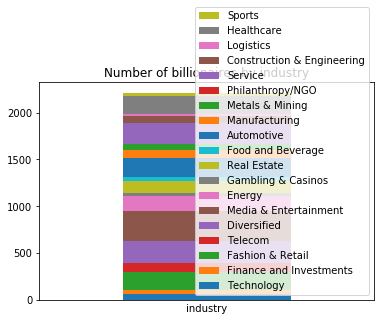

In [26]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df_forbes_merge.assign(dummy = 1).groupby(['dummy','industry']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of billionaires by industry')

# other it'll show up as 'dummy' 
plt.xlabel('industry')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df_forbes_merge['industry'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

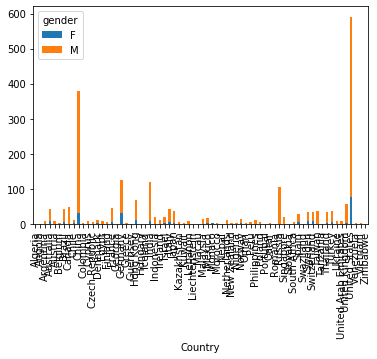

In [24]:
df_forbes_merge.groupby(['Country','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

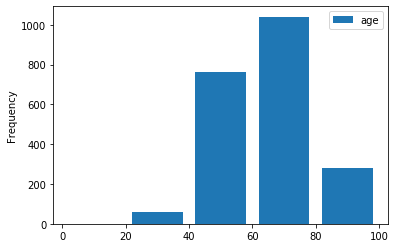

In [25]:
df_forbes_merge[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

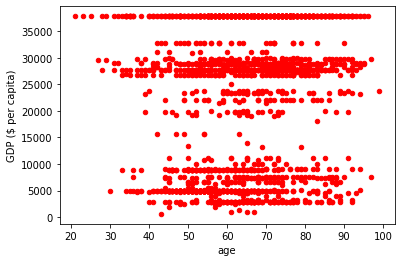

In [30]:
# a scatter plot comparing age and GDP ($ per capita)	
df_forbes_merge.plot(kind='scatter',x='age',y='GDP ($ per capita)',color='red')
plt.show()